In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [2]:
df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')

In [3]:
df.columns

Index(['Kód projektu', 'Název česky', 'Název anglicky', 'Anotace česky',
       'Anotace anglicky', 'Hlavní CEP obor', 'Vedlejší CEP obor',
       'Další vedlejší CEP obor', 'Hlavní FORD obor', 'Vedlejší FORD obor',
       'Další vedlejší FORD obor', 'Kategorie VaV', 'Hlavní účastníci',
       'Další účastníci', 'Výčet právních forem účastníků',
       'Výčet krajů účastníků', 'Výčet zemí účastníků',
       'Podrobné informace o účastnících', 'Hlavní řešitelé', 'Další řešitelé',
       'Klíčová slova', 'Výčet druhů dosažených výsledků', 'Poskytovatel',
       'Program', 'Uznané náklady', 'Podpora ze SR',
       'Ostatní veřejné zdroje fin.', 'Neveřejné zdroje fin.',
       'Začátek řešení', 'Konec řešení', 'URL v Starfose', 'Relevance'],
      dtype='object')

In [4]:
# Info about data
for column in df:
    print(f'Pocet NaN v {column}: {df[column].isna().sum()}')

Pocet NaN v Kód projektu: 0
Pocet NaN v Název česky: 0
Pocet NaN v Název anglicky: 773
Pocet NaN v Anotace česky: 0
Pocet NaN v Anotace anglicky: 8302
Pocet NaN v Hlavní CEP obor: 5944
Pocet NaN v Vedlejší CEP obor: 28080
Pocet NaN v Další vedlejší CEP obor: 40960
Pocet NaN v Hlavní FORD obor: 47487
Pocet NaN v Vedlejší FORD obor: 50308
Pocet NaN v Další vedlejší FORD obor: 51217
Pocet NaN v Kategorie VaV: 16996
Pocet NaN v Hlavní účastníci: 16426
Pocet NaN v Další účastníci: 25623
Pocet NaN v Výčet právních forem účastníků: 992
Pocet NaN v Výčet krajů účastníků: 1224
Pocet NaN v Výčet zemí účastníků: 992
Pocet NaN v Podrobné informace o účastnících: 0
Pocet NaN v Hlavní řešitelé: 16901
Pocet NaN v Další řešitelé: 47264
Pocet NaN v Klíčová slova: 13685
Pocet NaN v Výčet druhů dosažených výsledků: 12770
Pocet NaN v Poskytovatel: 0
Pocet NaN v Program: 0
Pocet NaN v Uznané náklady: 0
Pocet NaN v Podpora ze SR: 0
Pocet NaN v Ostatní veřejné zdroje fin.: 0
Pocet NaN v Neveřejné zdroje fin.

In [24]:
df[['Výčet druhů dosažených výsledků']].dropna().head()

,Výčet druhů dosažených výsledků
0,3; 48
1,2; 48
2,48
3,1; 48
4,48


In [102]:
NaN_fields = df[['Název anglicky', 'Anotace anglicky', 'Hlavní CEP obor', 'Klíčová slova']].isna().any(axis=1)
cleaned_df = df[~NaN_fields]
cleaned_df['DobaReseni'] = cleaned_df['Konec řešení'] - cleaned_df['Začátek řešení'] 
len(cleaned_df)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


30988

In [103]:
subset_df = cleaned_df[[
    'Kód projektu',
    'Název česky',
    'Název anglicky',
    'Anotace česky',
    'Anotace anglicky',
    'Hlavní CEP obor',
    'Klíčová slova',
    'Podrobné informace o účastnících',
    'Poskytovatel',
    'Program',
    'Uznané náklady',
    'Podpora ze SR',
    'Ostatní veřejné zdroje fin.',
    'Neveřejné zdroje fin.',
    'Začátek řešení',
    'Konec řešení',
    'DobaReseni',
    'Relevance']]
subset_df.dtypes

Kód projektu                         object
Název česky                          object
Název anglicky                       object
Anotace česky                        object
Anotace anglicky                     object
Hlavní CEP obor                      object
Klíčová slova                        object
Podrobné informace o účastnících     object
Poskytovatel                         object
Program                              object
Uznané náklady                        int64
Podpora ze SR                         int64
Ostatní veřejné zdroje fin.           int64
Neveřejné zdroje fin.                 int64
Začátek řešení                        int64
Konec řešení                          int64
DobaReseni                            int64
Relevance                           float64
dtype: object

In [74]:
# Poskytovatele:
subset_df['Poskytovatel'].unique()

array(['MZ - Ministerstvo zdravotnictví',
       'MZe - Ministerstvo zemědělství',
       'MŽP - Ministerstvo životního prostředí',
       'AV ČR - Akademie věd České republiky',
       'MD - Ministerstvo dopravy',
       'MPO - Ministerstvo průmyslu a obchodu',
       'MPSV - Ministerstvo práce a sociálních věcí',
       'MŠMT - Ministerstvo školství, mládeže a tělovýchovy',
       'ČBÚ - Český báňský úřad', 'BIS - Bezpečnostní informační služba',
       'MI - Ministerstvo informatiky', 'MK - Ministerstvo kultury',
       'GA ČR - Grantová agentura České republiky',
       'SÚJB - Státní úřad pro jadernou bezpečnost',
       'ÚřVl ČR - Úřad vlády České republiky', 'MO - Ministerstvo obrany',
       'MZV - Ministerstvo zahraničních věcí',
       'MS - Ministerstvo spravedlnosti', 'MV - Ministerstvo vnitra',
       'NBÚ - Národní bezpečnostní úřad',
       'TA ČR - Technologická agentura ČR',
       'MH - Ministerstvo hospodářství', 'KUL - Ústecký kraj',
       'KHK - Královéhradecký kr

In [75]:
# CEP (Centralni Evidence Projektu) obory:
subset_df['Hlavní CEP obor'].unique()

array(['FB - Endokrinologie, diabetologie, metabolismus, výživa',
       'EB - Genetika a molekulární biologie',
       'FR - Farmakologie a lékárnická chemie', 'FO - Dermatovenerologie',
       'FH - Neurologie, neurochirurgie, neurovědy', 'FM - Hygiena',
       'FN - Epidemiologie, infekční nemoci a klinická imunologie',
       'FA - Kardiovaskulární nemoci včetně kardiochirurgie',
       'FL - Psychiatrie, sexuologie',
       'FE - Ostatní obory vnitřního lékařství',
       'FK - Gynekologie a porodnictví', 'FI - Traumatologie a ortopedie',
       'FP - Ostatní lékařské obory',
       'FF - ORL, oftalmologie, stomatologie',
       'FJ - Chirurgie včetně transplantologie', 'FC - Pneumologie',
       'FD - Onkologie a hematologie',
       'GF - Choroby, škůdci, plevely a ochrana rostlin',
       'GH - Výživa hospodářských zvířat',
       'GJ - Choroby a škůdci zvířat, veterinární medicina',
       'EE - Mikrobiologie, virologie', 'EC - Imunologie',
       'EI - Biotechnologie a bionik

In [76]:
# Programy
subset_df['Program'].unique()

array(['1A - Zdraví obyvatel',
       'NS - VaV pro Ministerstvo zdravotnictví II',
       '1B - Kvalitní a bezpečná výživa',
       '1C - Krajina a sídla budoucnosti',
       '1D - Životní prostředí a ochrana přírodních zdrojů',
       '1E - Informační společnost', '1F - Bezpečná a ekonomická doprava',
       '1G - Využití přírodních zdrojů', '1H - POKROK',
       '1I - Racionální využití energie a obnovitelné přírodní zdroje',
       '1J - Moderní společnost a její proměny',
       '1K - Podpora začínajících pracovníků výzkumu',
       '1M - Výzkumná centra', '1N - Informační infrastruktura výzkumu',
       '1P - Regionální a mezinárodní spolupráce ve výzkumu',
       '1Q - Podpora projektů cíleného výzkumu',
       '1R - Krajina a sídla budoucnosti', '2A - Trvalá  prosperita',
       '2B - Zdravý a kvalitní život',
       '2C - Informační technologie pro znalostní společnost',
       '2D - Sociálně-ekonomický rozvoj české společnosti',
       '2E - Lidské zdroje',
       '2G - Podpo

In [122]:
def trim_and_split(x):
    x = x.split('\n')
    for i in range(len(x)):
        x[i] = x[i].split('(')[0].strip()
    return tuple(x)
subset_df['Ucastnici'] = subset_df['Podrobné informace o účastnících'].apply(trim_and_split)
print(f'Pocet ucastniku: {len(subset_df["Ucastnici"].unique())}')

Pocet ucastniku: 10261


/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Count', ylabel='Hlavní CEP obor'>

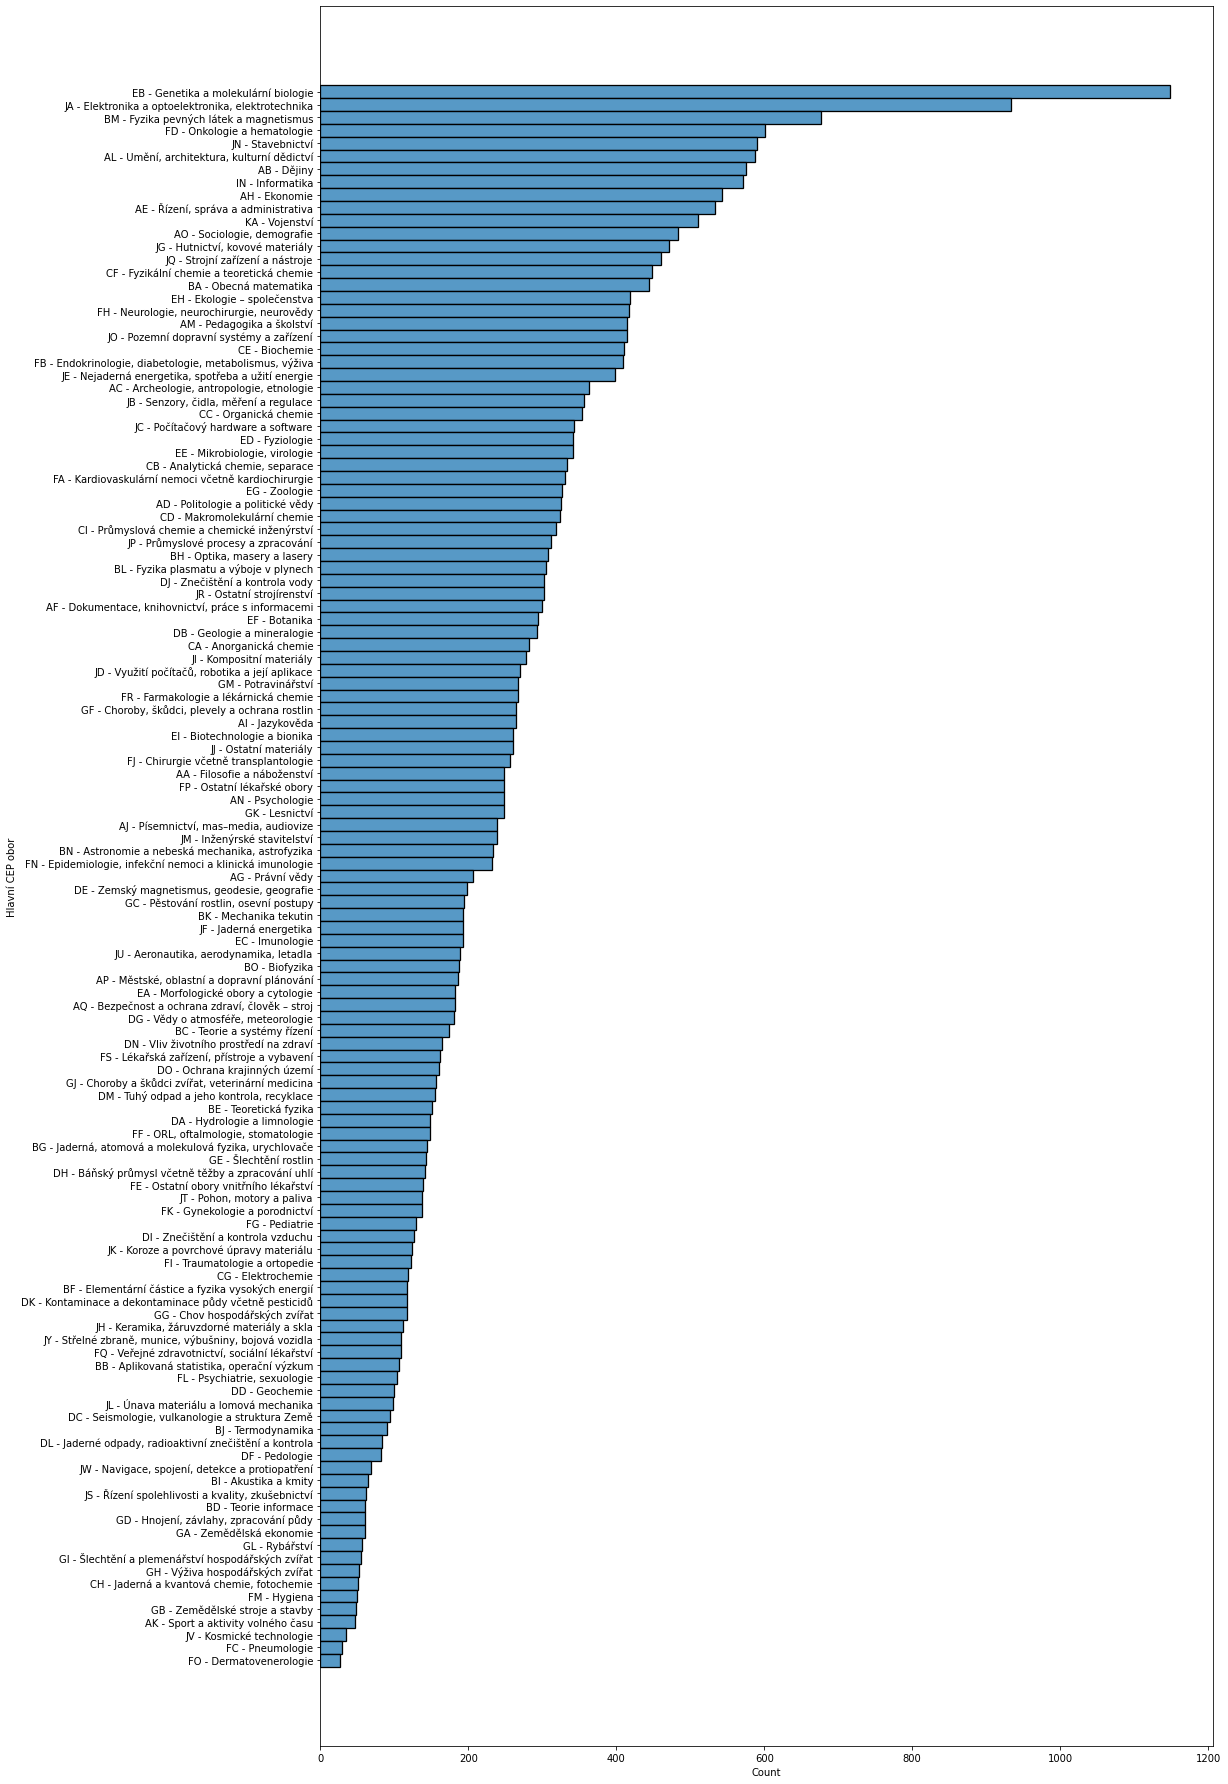

In [96]:
def sort_by_group_counts(df, key, descending=True):
    new_df = df.iloc[df.groupby(key)[key].transform('size').argsort(kind='mergesort')]
    if descending:
        return new_df[::-1]
    else:
        return new_df
    
plt.figure(figsize=(16, 32))
sorted_domains = sort_by_group_counts(subset_df, 'Hlavní CEP obor')
sns.histplot(sorted_domains, y='Hlavní CEP obor')

<AxesSubplot:xlabel='Count', ylabel='Poskytovatel'>

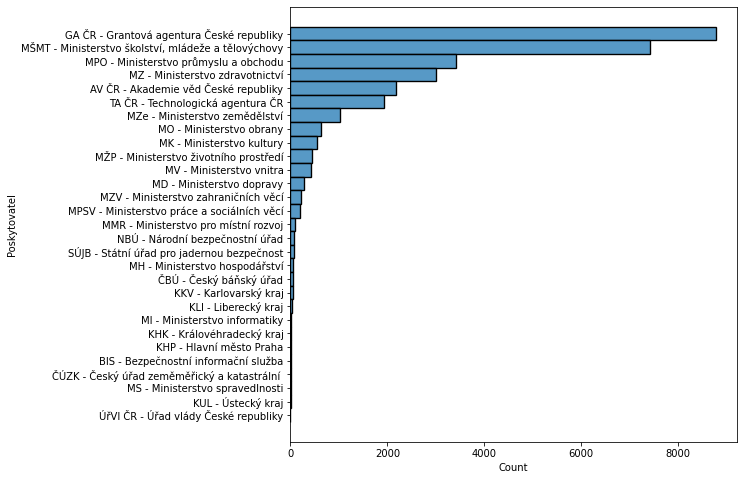

In [99]:
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'Poskytovatel')
sns.histplot(sorted_domains, y='Poskytovatel')

<AxesSubplot:xlabel='DobaReseni', ylabel='Count'>

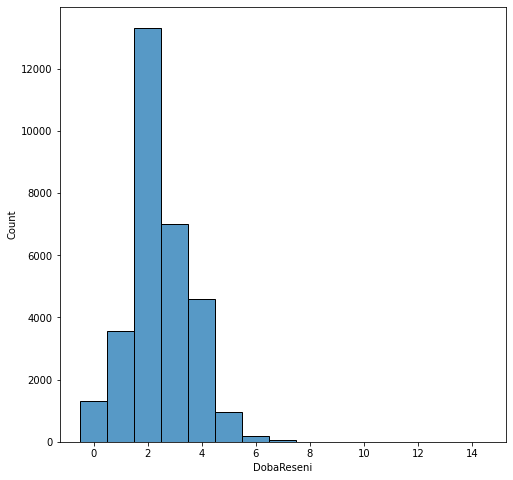

In [269]:
# Delka projektu -> normalni rozdeleni s tezkym ocasem huh
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'DobaReseni')
sns.histplot(sorted_domains, x='DobaReseni', discrete=True)

<AxesSubplot:xlabel='Začátek řešení', ylabel='Count'>

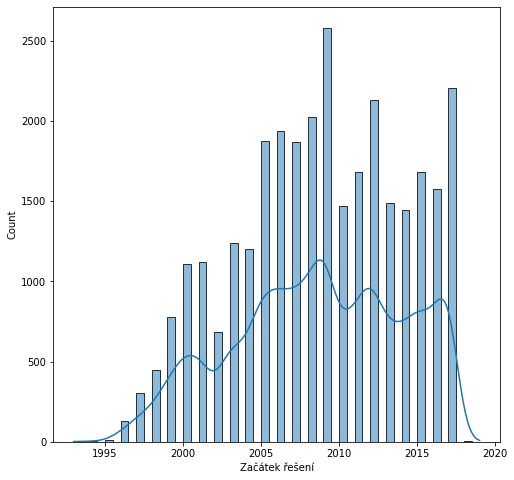

In [120]:
# Zacatky projektu
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'Začátek řešení')
sns.histplot(sorted_domains, x='Začátek řešení', kde=True)

<AxesSubplot:xlabel='Konec řešení', ylabel='Count'>

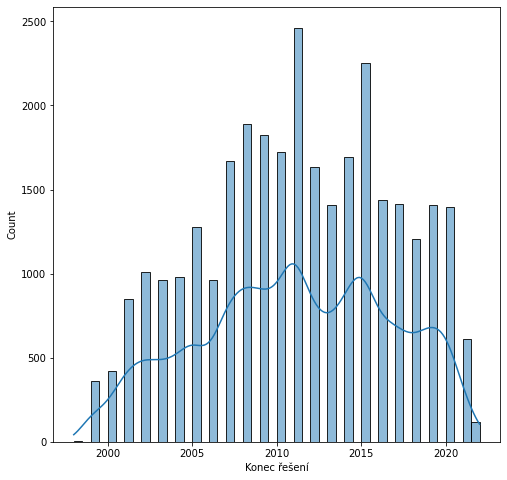

In [121]:
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'Konec řešení')
sns.histplot(sorted_domains, x='Konec řešení', kde=True)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<AxesSubplot:xlabel='Count', ylabel='Ucastnici'>

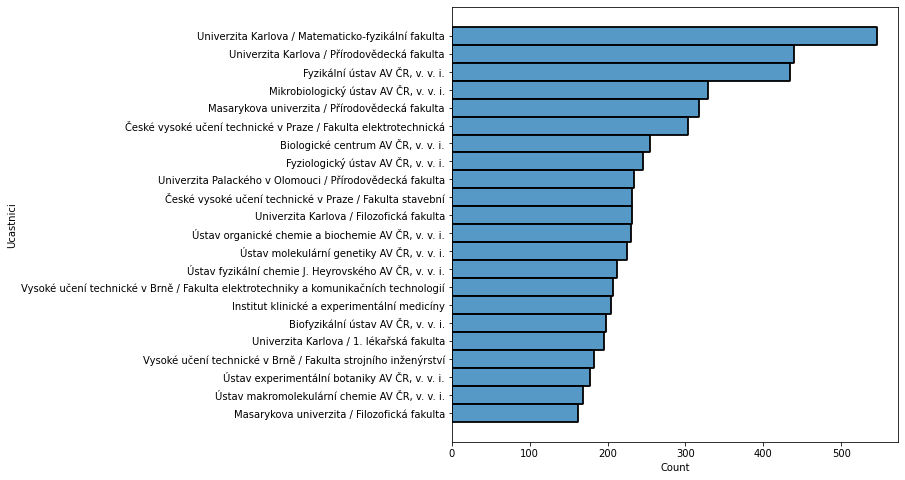

In [164]:
def filter_by_count(df, key, threshold, up=True):
    if up:
        new_df = df[df.groupby(key)[key].transform('size') >= threshold]
    else:
        new_df = df[df.groupby(key)[key].transform('size') <= threshold]
    return new_df

top_participants = filter_by_count(subset_df, 'Ucastnici', 150)
top_participants['Ucastnici'] = top_participants['Ucastnici'].apply(lambda x: ';'.join(x))

plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(top_participants, 'Ucastnici')
sns.histplot(sorted_domains, y='Ucastnici')

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Podpora ze SR', ylabel='Ucastnici'>

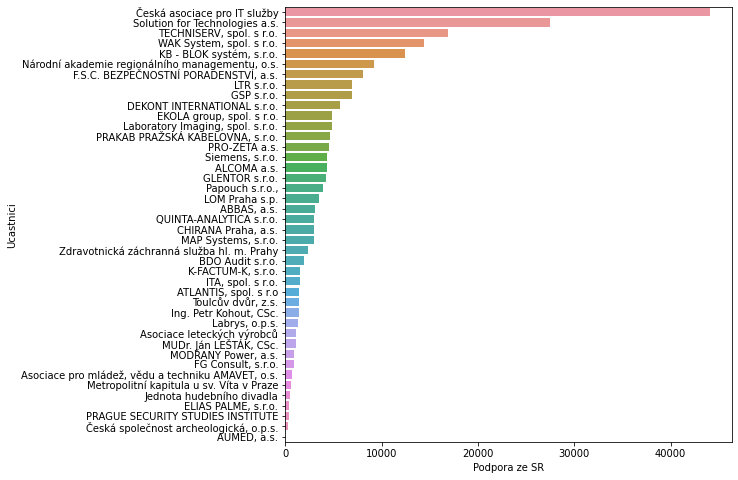

In [229]:
top_participants = filter_by_count(subset_df, 'Ucastnici', 1, up=False)
sus_projects = top_participants[(top_participants['Ucastnici'].map(len) == 1) & (top_participants['Podrobné informace o účastnících'].str.contains('Praha 1'))]

sus_projects['Ucastnici'] = sus_projects['Ucastnici'].apply(lambda x: ';'.join(x))
plt.figure(figsize=(8, 8))
sorted_domains = sus_projects.sort_values('Podpora ze SR')[::-1]
sns.barplot(y='Ucastnici', x='Podpora ze SR', data=sorted_domains)

In [197]:
sus_projects

,Kód projektu,Název česky,Název anglicky,Anotace česky,Anotace anglicky,Hlavní CEP obor,Klíčová slova,Podrobné informace o účastnících,Poskytovatel,Program,Uznané náklady,Podpora ze SR,Ostatní veřejné zdroje fin.,Neveřejné zdroje fin.,Začátek řešení,Konec řešení,DobaReseni,Relevance,Ucastnici
91,1C/4/40/04,Výzkum odcizování člověka přírodě,Human disaffection to the nature research,Výzkum vlivu působení přírodního a antropogenn...,Research on natural and anthropogenic environm...,DN - Vliv životního prostředí na zdraví,biodiversity; sociobiology; sustainable develo...,"Toulcův dvůr, z.s. (ico: 62934171; forma: ZSP ...",MŽP - Ministerstvo životního prostředí,1C - Krajina a sídla budoucnosti,1893,1434,459,0,2004,2005,1,1.0,"Toulcův dvůr, z.s."
1016,2A-1TP1/046,Výzkum a vývoj technologického zařízení pro zv...,Research and development of a process equipmen...,Projekt je zaměřen na výzkum a vývoj nových te...,This project focuses on research and developme...,"JE - Nejaderná energetika, spotřeba a užití en...",Oil; downhole; oilfield; extra heavy oil; para...,Solution for Technologies a.s. (ico: 26228521;...,MPO - Ministerstvo průmyslu a obchodu,2A - Trvalá prosperita,42262,27463,0,14799,2006,2011,5,1.0,Solution for Technologies a.s.
1893,7D13003,Výpočetní jednotka s vysokým výkonem kombinova...,Combination of a High Performance Computing (H...,Vytvořit systém využívající odpadní teplo vzni...,SMARTHEAT aims to develop a flexible High Perf...,"JA - Elektronika a optoelektronika, elektrotec...",SMARTHEAT,"Papouch s.r.o., (ico: 27096891; forma: POO - P...","MŠMT - Ministerstvo školství, mládeže a tělový...",7D - Eurostars,7921,3961,0,3961,2014,2015,1,1.0,"Papouch s.r.o.,"
1918,7D17004,Rozšíření DRBD pro nasazení velkých cloud depl...,Extending DRBD for Large Scale Cloud Deployments,DRBD je de-fakto standardem pro redundantní bl...,The high-reliability storage solution DRBD wil...,IN - Informatika,cloud storage; DRBD; open source,PRO-ZETA a.s. (ico: 15891585; forma: POO - Prá...,"MŠMT - Ministerstvo školství, mládeže a tělový...",7D - Eurostars,9166,4575,4583,0,2017,2019,2,1.0,PRO-ZETA a.s.
3300,DA99P01OLK001,Thesaurus absconditus. Ediční řada památek sta...,Thesaurus Absconditus Edition. Old Czech Liter...,Thesaurus absconditus. Ediční řada památek sta...,Thesaurus Absconditus (TA) is a new edition pr...,"AJ - Písemnictví, mas–media, audiovize",Edition project; Old Czech literature; Multian...,"ATLANTIS, spol. s r.o (ico: 47912383; forma: P...",MK - Ministerstvo kultury,DA - Vědeckodokumentární zhodnocení vývoje čes...,1578,1436,0,142,1999,2003,4,1.0,"ATLANTIS, spol. s r.o"
3350,DD07P03OUK003,Marketingový potenciál českého operního publika,Czech Opera Audience Marketing Potential,Hlavním cílem projektu Marketingový potenciál ...,Among major objectives of the project are cons...,AA - Filosofie a náboženství,Opera Audience; Czech Opera Audience; Arts Mar...,Jednota hudebního divadla (ico: 60447711; form...,MK - Ministerstvo kultury,"DD - Zhodnocení vývoje hudebního, divadelního ...",484,484,0,0,2007,2011,4,1.0,Jednota hudebního divadla
5023,EE2.4.31.0013,Praktická Akademie IT znalostí - rozvoj odborn...,IT Academy - professional skills of university...,Hlavním cílem projektu je podpora spolupráce m...,The main objective of the project is to promot...,IN - Informatika,co-operation in IT sector,Česká asociace pro IT služby (ico: 22728678; f...,"MŠMT - Ministerstvo školství, mládeže a tělový...",EE - OP VK,44134,44134,0,0,2012,2014,2,1.0,Česká asociace pro IT služby
5972,EG16_083/0009885,Rozšíření funkcionalit zabezpečovacího systému...,Extending the functionality of the security sy...,Cílem projektu je rozšířit funkcionality zabez...,Extending the functionality of the security sy...,"JA - Elektronika a optoelektronika, elektrotec...",security system,"ABBAS, a.s. (ico: 63478269; forma: POO - Právn...",MPO - Ministerstvo průmyslu a obchodu,EG - OP PIK,17577,3046,0,9667,2017,2020,3,1.0,"ABBAS, a.s."
6001,EG16_083/0010301,Transfer faktor - vý

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Podpora ze SR', ylabel='Density'>

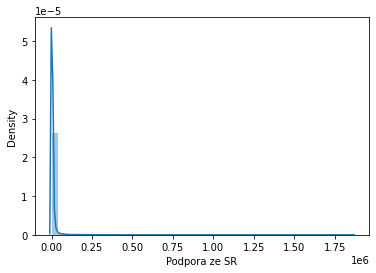

In [263]:
# Rozdeleni dat
sns.distplot(subset_df['Podpora ze SR'])

In [217]:
def filter_by_value(df, key, threshold, up=True):
    if up:
        new_df = df[df[key] > threshold]
    else:
        new_df = df[df[key] < threshold]
    return new_df

most_expensive_projects = filter_by_value(subset_df, 'Podpora ze SR', 1000000)
most_expensive_projects

,Kód projektu,Název česky,Název anglicky,Anotace česky,Anotace anglicky,Hlavní CEP obor,Klíčová slova,Podrobné informace o účastnících,Poskytovatel,Program,Uznané náklady,Podpora ze SR,Ostatní veřejné zdroje fin.,Neveřejné zdroje fin.,Začátek řešení,Konec řešení,DobaReseni,Relevance,Ucastnici
4440,ED1.1.00/02.0061,ELI: EXTREME LIGHT INFRASTRUCTURE,ELI: EXTREME LIGHT INFRASTRUCTURE,Projekt ELI je součástí evropské cestovní mapy...,ELI project is a part of the European roadmap ...,BL - Fyzika plasmatu a výboje v plynech,New technique of generation of ultrashort lase...,"Fyzikální ústav AV ČR, v. v. i. (ico: 68378271...","MŠMT - Ministerstvo školství, mládeže a tělový...",ED - OP VaVpI,6800576,1020086,5780490,0,2011,2015,4,1.0,"(Fyzikální ústav AV ČR, v. v. i.,)"
5110,EF15_008/0000162,ELI - EXTREME LIGHT INFRASTRUCTURE - fáze 2,ELI - EXTREME LIGHT INFRASTRUCTURE - phase 2,Hlavními cíli projektu ELI je vybudování nejmo...,The main objectives of the ELI project is to b...,"BH - Optika, masery a lasery",laser beam,"Fyzikální ústav AV ČR, v. v. i. (ico: 68378271...","MŠMT - Ministerstvo školství, mládeže a tělový...",EF - OPVVV,1859488,1859488,0,92974,2016,2018,2,1.0,"(Fyzikální ústav AV ČR, v. v. i.,)"
5424,EF16_040/0003542,Národní centrum pro elektronické informační zd...,National Centre for Electronic Information Res...,Globálním cílem projektu je zvýšení výkonnost...,The global objective of the project is to incr...,"AF - Dokumentace, knihovnictví, práce s inform...",Information resources; scientific libraries; c...,Národní technická knihovna (ico: 61387142; for...,"MŠMT - Ministerstvo školství, mládeže a tělový...",EF - OPVVV,1104596,1104596,0,0,2017,2022,5,1.0,"(Národní technická knihovna,)"
36495,LM2010005,Velká infrastruktura CESNET,Large Infrastructure CESNET,"Cílem projektu ""Velká infrastruktura CESNET"" j...","The main goal of the project ""Large infrastruc...",IN - Informatika,e-infrastructure,"CESNET, zájmové sdružení právnických osob (ico...","MŠMT - Ministerstvo školství, mládeže a tělový...",LM - Projekty velkých infrastruktur pro VaVaI,2143612,1398800,12812,732000,2011,2015,4,1.0,"(CESNET, zájmové sdružení právnických osob, Ma..."


<AxesSubplot:xlabel='Podpora ze SR', ylabel='Název česky'>

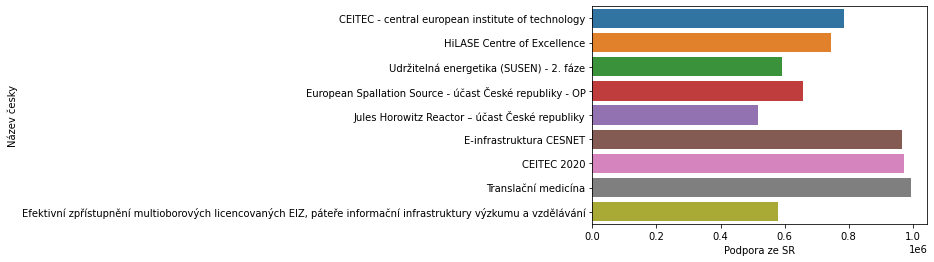

In [225]:
expensive_projects = filter_by_value(subset_df, 'Podpora ze SR', 500000)
expensive_projects = filter_by_value(expensive_projects, 'Podpora ze SR', 1000000, up=False)
sns.barplot(x='Podpora ze SR', y='Název česky', data=expensive_projects)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

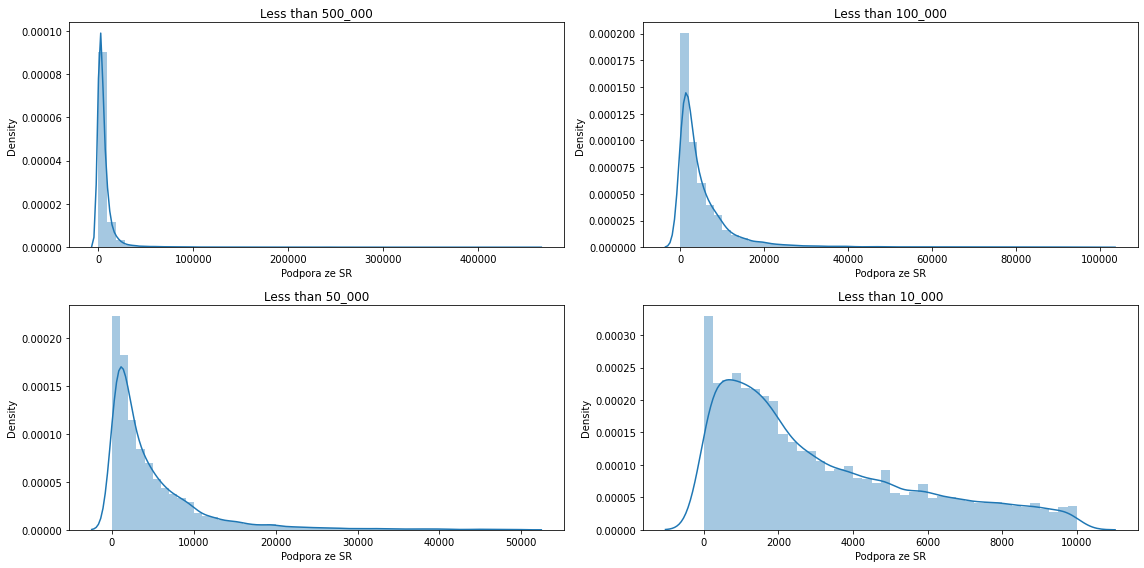

In [250]:
# Rozdeleni dat -> bez outlieru
# Vypada lognormalne -> muzu zkusit zlogaritmovat
fig, axes = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)

axes[0][0].set_title('Less than 500_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 500000]
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[0][0])

axes[0][1].set_title('Less than 100_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 100000]
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[0][1])

axes[1][0].set_title('Less than 50_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 50000]
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[1][0])

axes[1][1].set_title('Less than 10_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 10000]
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[1][1])

plt.tight_layout()

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

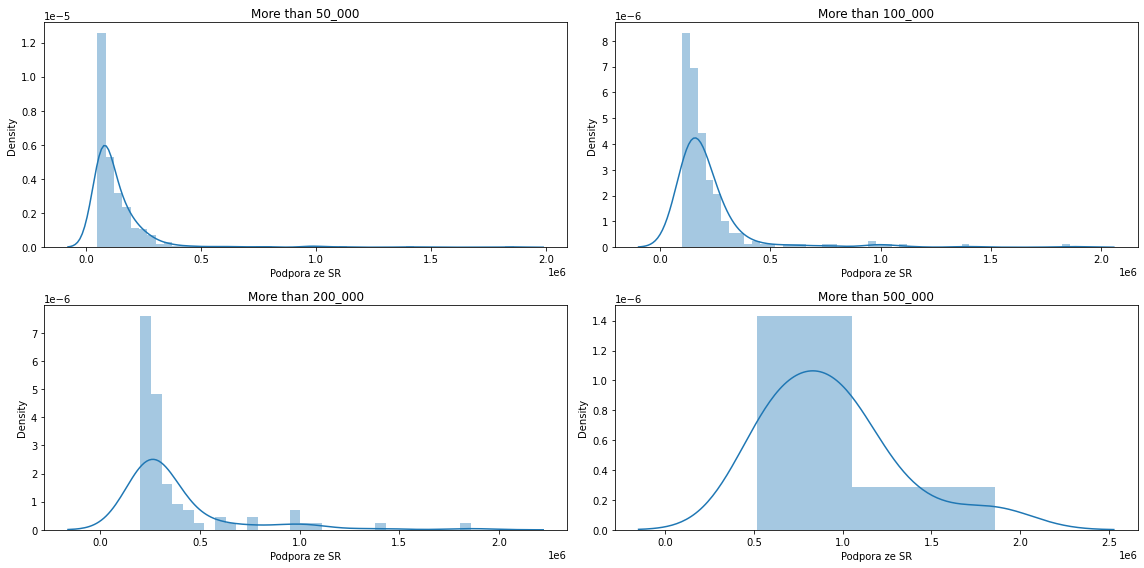

In [259]:
# Distribution of the outliers (more than 50_000)
fig, axes = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)

axes[0][0].set_title('More than 50_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 50_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[0][0])

axes[0][1].set_title('More than 100_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 100_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[0][1])

axes[1][0].set_title('More than 200_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 200_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[1][0])

axes[1][1].set_title('More than 500_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 500_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[1][1])

plt.tight_layout()

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

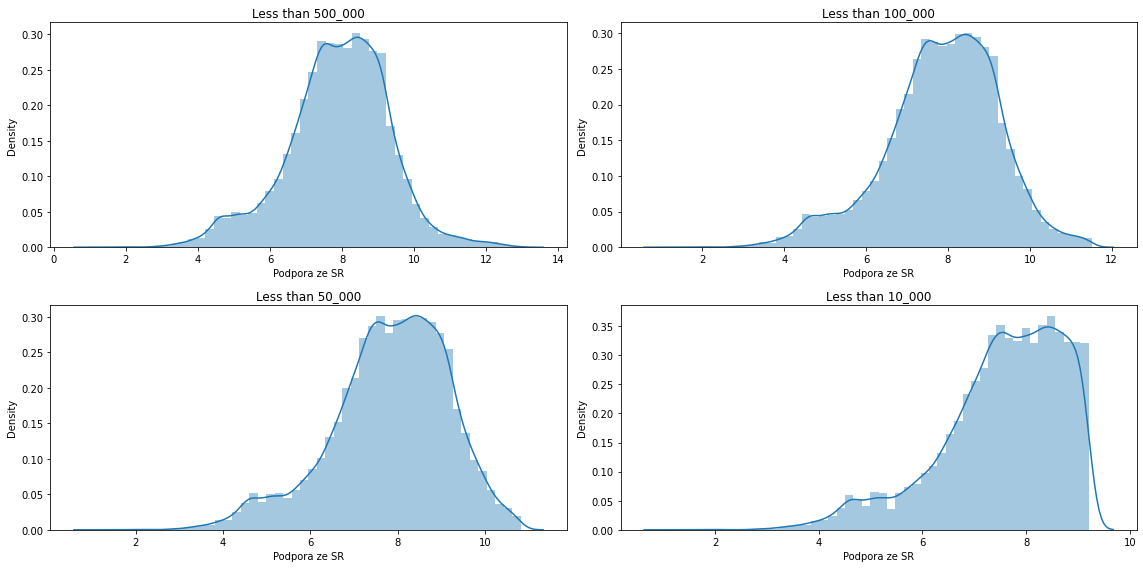

In [273]:
fig, axes = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)

axes[0][0].set_title('Less than 500_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 500000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[0][0])

axes[0][1].set_title('Less than 100_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 100000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[0][1])

axes[1][0].set_title('Less than 50_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 50000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[1][0])

axes[1][1].set_title('Less than 10_000')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 10000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'], ax=axes[1][1])

plt.tight_layout()

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Podpora ze SR', ylabel='Density'>

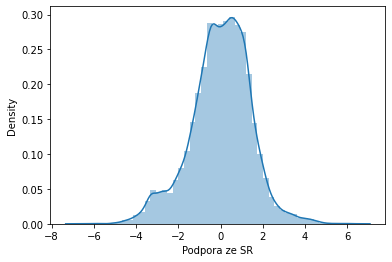

In [311]:
log_normal = subset_df['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
log_normal -= log_normal.mean()
log_normal = log_normal.dropna()
sns.distplot(log_normal)

In [339]:
from scipy.stats import anderson, kstest, t, ttest_ind, norm

In [349]:
normal_baseline = t.rvs(100, size=100)
print("Test normality using t-test:")
print(ttest_ind(log_normal, norm.rvs(size=log_normal.size)))
print("Baseline normal:")
print(ttest_ind(normal_baseline, normal_baseline))
print()
print("Perform an Anderson normality test:")
print(anderson(log_normal, dist='norm'))
print("Baseline normal:")
print(anderson(normal_baseline, dist='norm'))
print()
print("Perform Kolmogorov-Smirnov goodness of fit test to test for normality:")
print(kstest(log_normal, 'norm'))
print("Baseline normal:")
print(kstest(normal_baseline, 'norm'))

Test normality using t-test:
Ttest_indResult(statistic=0.31133390564520547, pvalue=0.7555478478116852)
Baseline normal:
Ttest_indResult(statistic=0.0, pvalue=1.0)

Perform an Anderson normality test:
AndersonResult(statistic=112.83181682734721, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Baseline normal:
AndersonResult(statistic=0.25266022284185397, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Perform Kolmogorov-Smirnov goodness of fit test to test for normality:
KstestResult(statistic=0.08204621247643795, pvalue=8.455304083231866e-181)
Baseline normal:
KstestResult(statistic=0.049739761144283356, pvalue=0.9551540292063364)
